# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [2]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

SyntaxError: ignored

In [3]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

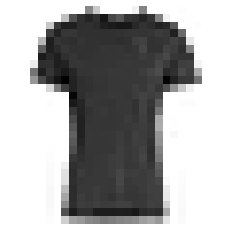

In [10]:
plt.imshow(X_train[999], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [13]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

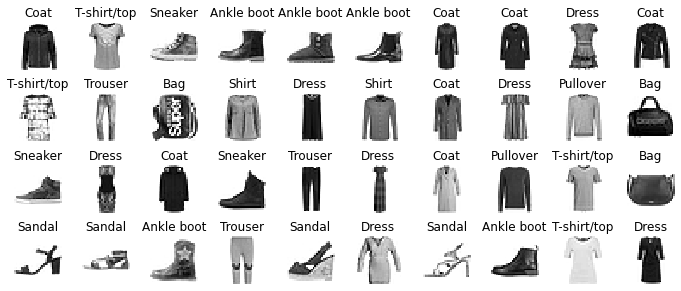

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.0027388 , -0.06752536, -0.07096191, ..., -0.02249451,
         0.05938461,  0.0235191 ],
       [-0.01141611, -0.05762197, -0.0093142 , ..., -0.00485109,
        -0.05354451,  0.05202761],
       [ 0.03387925, -0.04143525,  0.01635664, ...,  0.0515164 ,
        -0.02587066, -0.02400334],
       ...,
       [-0.03162111,  0.06444022,  0.01801638, ..., -0.05940164,
        -0.05942958, -0.05624704],
       [-0.0383608 , -0.00391198,  0.06306309, ...,  0.06033576,
        -0.04565676, -0.05685106],
       [-0.02883957, -0.00940864,  0.05724385, ...,  0.07103597,
         0.06968899,  0.02075578]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [31]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7183 - accuracy: 0.7649 - val_loss: 0.5086 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4883 - accuracy: 0.8306 - val_loss: 0.4369 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4423 - accuracy: 0.8461 - val_loss: 0.4341 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4156 - accuracy: 0.8549 - val_loss: 0.3983 - val_accuracy: 0.8690
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3960 - accuracy: 0.8615 - val_loss: 0.4074 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3785 - accuracy: 0.8673 - val_loss: 0.3736 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8711 - val_loss: 0.3788 - val_accuracy:

In [32]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

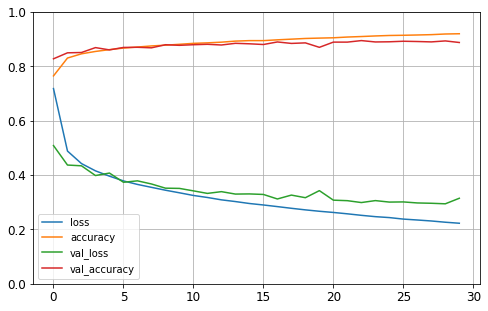

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8797


[0.346510648727417, 0.8797000050544739]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = model.predict(X_new)




classes_y=np.argmax(y_pred,axis=1)
classes_y

array([9, 2, 1])

In [39]:
np.array(class_names)[classes_y]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

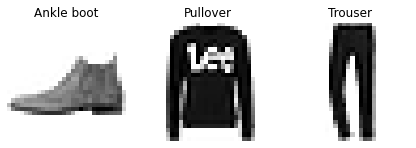

In [41]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

### 1-Plot Learning curves when using different optimizers

In [42]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [44]:
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4865 - accuracy: 0.8249 - val_loss: 0.3872 - val_accuracy: 0.8616
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3657 - accuracy: 0.8643 - val_loss: 0.3480 - val_accuracy: 0.8694
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3286 - accuracy: 0.8791 - val_loss: 0.3559 - val_accuracy: 0.8682
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3047 - accuracy: 0.8869 - val_loss: 0.3262 - val_accuracy: 0.8786
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2864 - accuracy: 0.8931 - val_loss: 0.3324 - val_accuracy: 0.8802
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.8975 - val_loss: 0.3336 - val_accuracy: 0.8862
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2572 - accuracy: 0.9018 - val_loss: 0.3154 - val_accuracy

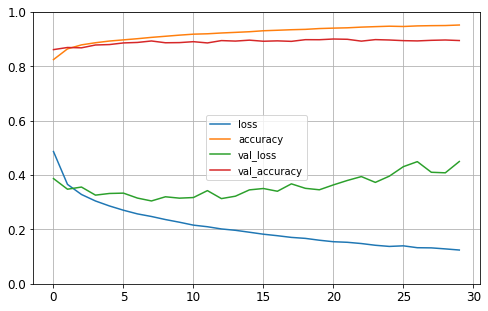

In [45]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


### 2-Plot Learning curves when using different batch size

In [46]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [47]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [48]:
history2 = model2.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 18s 3ms/step - loss: 0.5764 - accuracy: 0.7995 - val_loss: 0.4395 - val_accuracy: 0.8468
Epoch 2/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.4203 - accuracy: 0.8505 - val_loss: 0.3983 - val_accuracy: 0.8560
Epoch 3/30
5500/5500 [==============================] - 18s 3ms/step - loss: 0.3768 - accuracy: 0.8640 - val_loss: 0.3516 - val_accuracy: 0.8764
Epoch 4/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3495 - accuracy: 0.8729 - val_loss: 0.3415 - val_accuracy: 0.8776
Epoch 5/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3304 - accuracy: 0.8801 - val_loss: 0.3198 - val_accuracy: 0.8854
Epoch 6/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3129 - accuracy: 0.8867 - val_loss: 0.3468 - val_accuracy: 0.8712
Epoch 7/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.2994 - accuracy: 0.8911 - val_loss: 0.3226 - val_ac

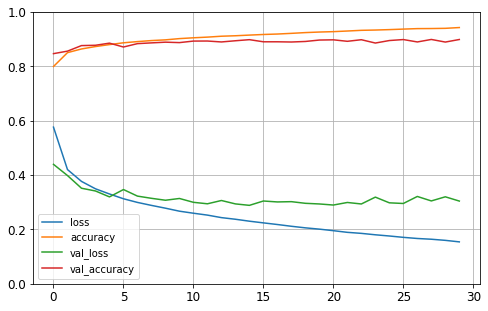

In [49]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 3-Plot Learning curves when using different number of epochs

In [50]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [51]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [52]:
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7178 - accuracy: 0.7639 - val_loss: 0.5025 - val_accuracy: 0.8276
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4893 - accuracy: 0.8293 - val_loss: 0.4552 - val_accuracy: 0.8402
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4433 - accuracy: 0.8443 - val_loss: 0.4085 - val_accuracy: 0.8612
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4150 - accuracy: 0.8549 - val_loss: 0.3910 - val_accuracy: 0.8652
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3957 - accuracy: 0.8619 - val_loss: 0.4013 - val_accuracy: 0.8614
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8664 - val_loss: 0.3799 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3669 - accuracy: 0.8702 - val_loss: 0.3762 - val_accuracy:

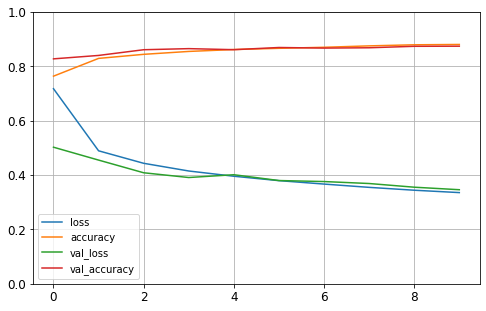

In [53]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 4-Add additional neurons and use Dropout Layer. Plot Learning curves

In [54]:

model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [55]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [56]:
history4 = model4.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7677 - accuracy: 0.7361 - val_loss: 0.5229 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5423 - accuracy: 0.8083 - val_loss: 0.4657 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4998 - accuracy: 0.8231 - val_loss: 0.4348 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4700 - accuracy: 0.8326 - val_loss: 0.4108 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4535 - accuracy: 0.8386 - val_loss: 0.4066 - val_accuracy: 0.8558
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4389 - accuracy: 0.8428 - val_loss: 0.3858 - val_accuracy: 0.8698
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4274 - accuracy: 0.8472 - val_loss: 0.3854 - val_accuracy:

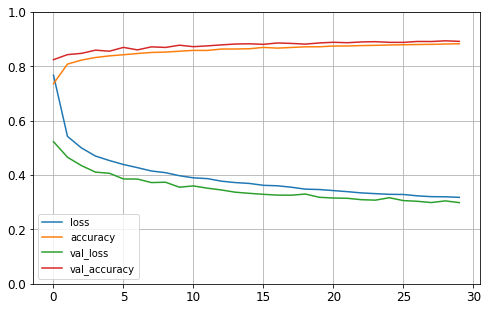

In [57]:
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 5- Use Batch Normalisation

In [58]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(input_shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])



In [59]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [60]:
history5 = model5.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5251 - accuracy: 0.8147 - val_loss: 0.4036 - val_accuracy: 0.8546
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3865 - accuracy: 0.8615 - val_loss: 0.3648 - val_accuracy: 0.8656
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3475 - accuracy: 0.8736 - val_loss: 0.3353 - val_accuracy: 0.8778
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3242 - accuracy: 0.8821 - val_loss: 0.3231 - val_accuracy: 0.8832
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3079 - accuracy: 0.8871 - val_loss: 0.3227 - val_accuracy: 0.8820
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.8907 - val_loss: 0.3191 - val_accuracy: 0.8840
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2794 - accuracy: 0.8980 - val_loss: 0.3245 - val_accuracy:

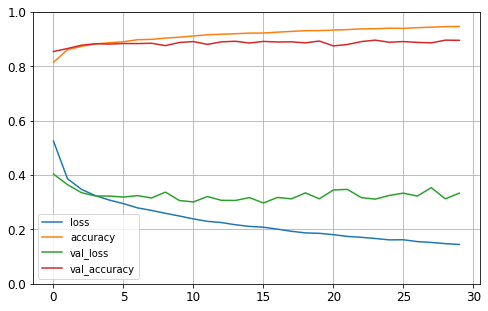

In [61]:
import pandas as pd

pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 6-repeat with more layers

# selu function

In [62]:
model6 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [63]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [64]:
history6 = model6.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6277 - accuracy: 0.7898 - val_loss: 0.4699 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4445 - accuracy: 0.8411 - val_loss: 0.4148 - val_accuracy: 0.8548
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4044 - accuracy: 0.8550 - val_loss: 0.3779 - val_accuracy: 0.8692
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3777 - accuracy: 0.8645 - val_loss: 0.3669 - val_accuracy: 0.8702
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3581 - accuracy: 0.8701 - val_loss: 0.3638 - val_accuracy: 0.8744
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3429 - accuracy: 0.8767 - val_loss: 0.3412 - val_accuracy: 0.8772
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3296 - accuracy: 0.8819 - val_loss: 0.3324 - val_accuracy:

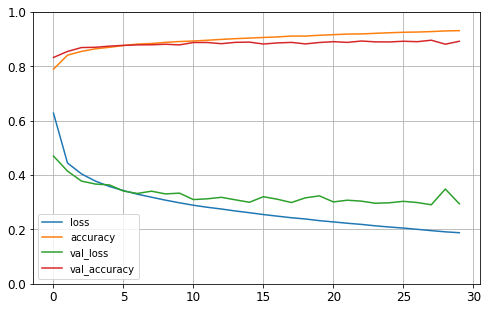

In [65]:
import pandas as pd

pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# sigmoid function

In [66]:
model7 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    #keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(200, activation="sigmoid"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [67]:
history7 = model7.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.1406 - accuracy: 0.6481 - val_loss: 0.6811 - val_accuracy: 0.7648
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6175 - accuracy: 0.7785 - val_loss: 0.5512 - val_accuracy: 0.8068
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5406 - accuracy: 0.8070 - val_loss: 0.4996 - val_accuracy: 0.8304
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4955 - accuracy: 0.8238 - val_loss: 0.4715 - val_accuracy: 0.8364
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4653 - accuracy: 0.8344 - val_loss: 0.4364 - val_accuracy: 0.8524
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4434 - accuracy: 0.8419 - val_loss: 0.4405 - val_accuracy: 0.8458
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4264 - accuracy: 0.8475 - val_loss: 0.4188 - val_accuracy:

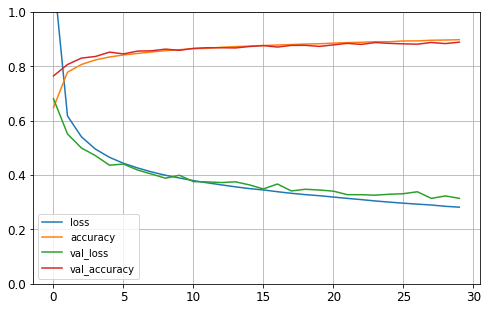

In [68]:
import pandas as pd

pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 7-apply on different datasets